<a href="https://colab.research.google.com/github/Justy-11/Analysis-of-Transfer-Learning-for-Image-Classification-on-Sparse-Data/blob/main/IRP_Plotting_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-4-b57764fb09dd>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DA_FT'] = filtered_data.apply(lambda row: f"DA={row['DA']}, FT={row['FT']}", axis=1)
<ipython-input-4-b57764fb09dd>:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Sample size', y='Test acc', data=subset_data, color=da_ft_colors[condition],
<ipython-input-4-b57764fb09dd>:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Sample size', y='Test acc', data=subset_data, color=da_ft_colors[condition],
<ipython-input-4-b57764fb09dd>:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

 

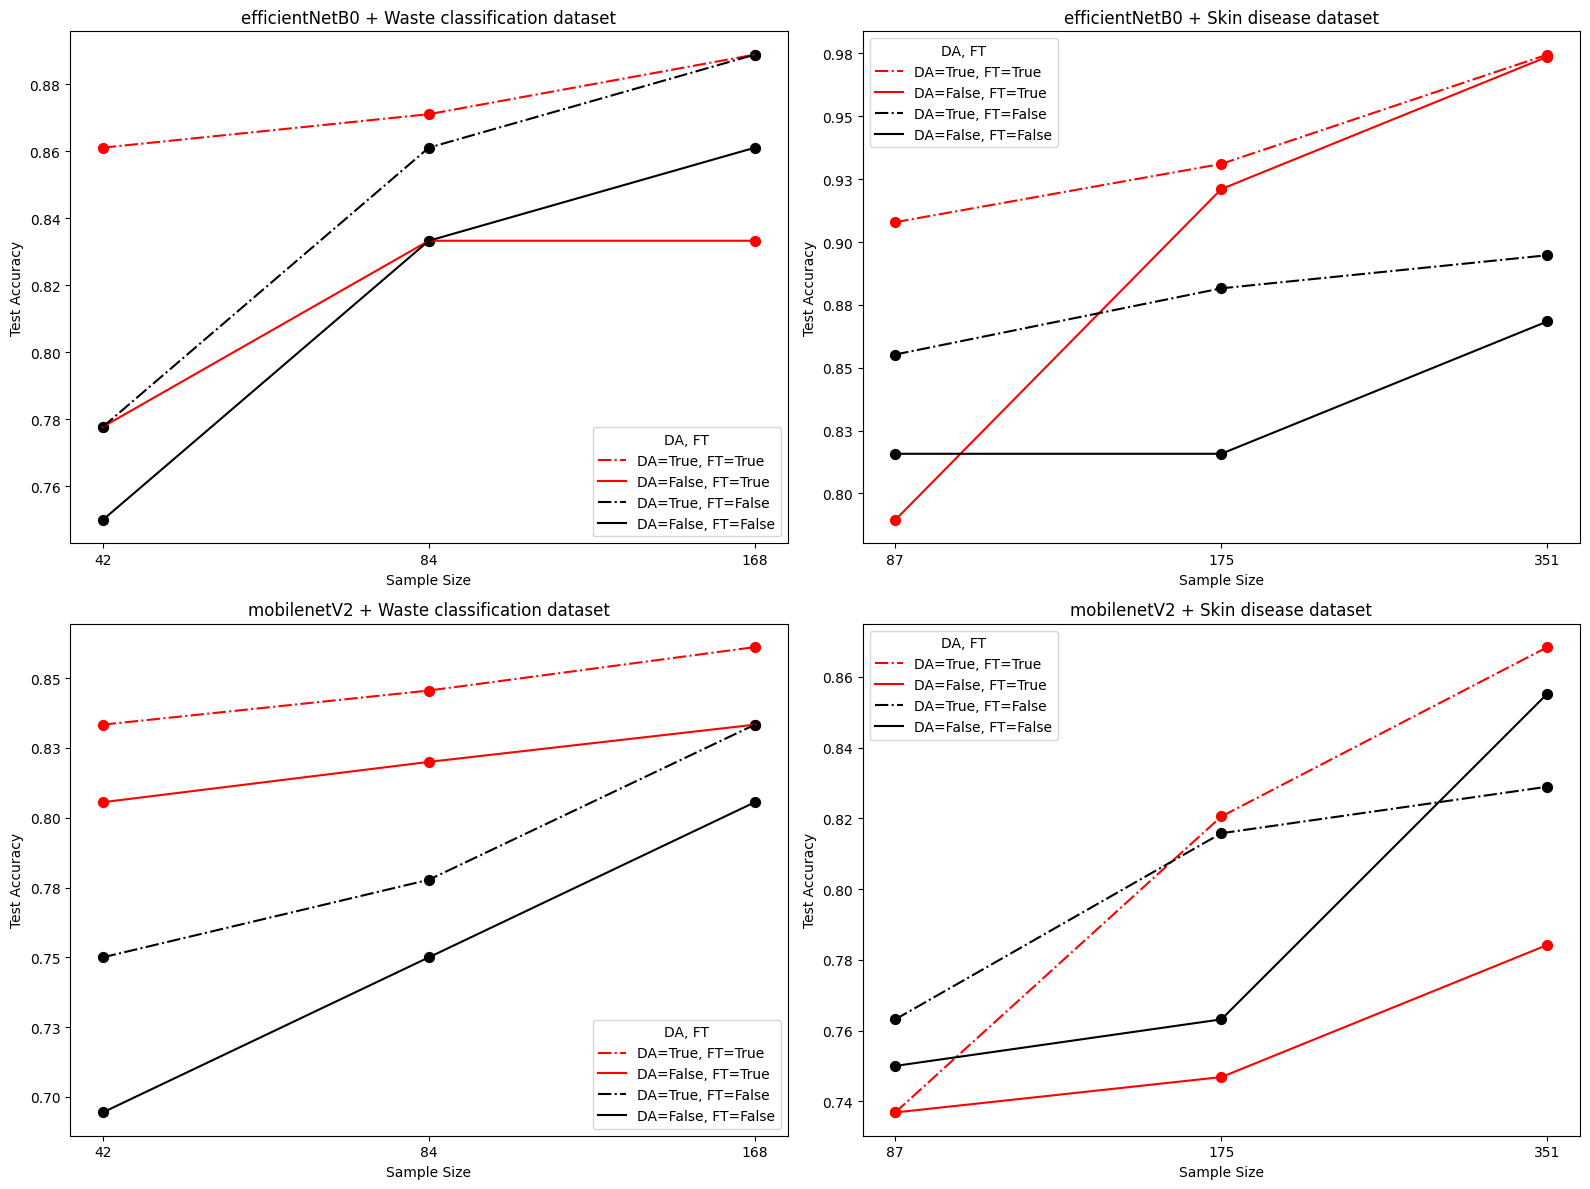

In [ ]:
# Load the data from the Excel file
excel_path = "/content/training_data.xlsx"
df = pd.read_excel(excel_path)

# Define sample sizes, DA, and FT conditions
sample_sizes = {'S': {'W': 42, 'SD': 87}, 'M': {'W': 84, 'SD': 175}, 'L': {'W': 168, 'SD': 351}}

da_ft_conditions = [(True, True), (False, True), (True, False), (False, False)]
da_ft_labels = {(True, True): 'DA=True, FT=True', (False, True): 'DA=False, FT=True',
                (True, False): 'DA=True, FT=False', (False, False): 'DA=False, FT=False'}
da_ft_colors = {(True, True): 'red', (False, True): 'red', (True, False): 'black', (False, False): 'black'}
da_ft_linestyles = {(True, True): '-.', (False, True): '-', (True, False): '-.', (False, False): '-'}


# Set a larger overall figure size
plt.figure(figsize=(16, 12))

# Iterate over each (model, dataset) combination
for idx, (model, dataset) in enumerate([('efB0', 'W'), ('efB0', 'SD'), ('mobV2', 'W'), ('mobV2', 'SD')]):
    # Filter the data based on model and dataset
    filtered_data = df[(df['Model'] == model) & (df['Dataset'] == dataset)]

    # Create a new column 'DA_FT' combining 'DA' and 'FT'
    filtered_data['DA_FT'] = filtered_data.apply(lambda row: f"DA={row['DA']}, FT={row['FT']}", axis=1)

    # Create a subplot for each (model, dataset) combination
    plt.subplot(2, 2, idx + 1)
    for condition in da_ft_conditions:
        subset_data = filtered_data[filtered_data['DA_FT'] == da_ft_labels[condition]]
        sns.lineplot(x='Sample size', y='Test acc', data=subset_data, color=da_ft_colors[condition],
                     linestyle=da_ft_linestyles[condition], markers=True, label=da_ft_labels[condition], ci=None)

        # Put a point on each (x, y) position
        plt.scatter(subset_data['Sample size'], subset_data['Test acc'], color=da_ft_colors[condition], s=50)

    # Set plot title and labels
    # plt.title(f'Test Accuracy for Model {model}, Dataset {dataset}')

    if model == 'efB0':
      model_name = 'efficientNetB0'

    if model == 'mobV2':
      model_name = 'mobilenetV2'

    if dataset == 'SD':
      dataset_name = 'Skin disease dataset'

    if dataset == 'W':
      dataset_name = 'Waste classification dataset'

    plt.title(f'{model_name} + {dataset_name}')
    plt.xlabel('Sample Size')
    plt.ylabel('Test Accuracy')

    # Convert dict_keys to a list for plt.xticks
    plt.xticks(list(sample_sizes.keys()), [sample_sizes[size][dataset] for size in sample_sizes.keys()])

    plt.legend(title='DA, FT')

    # Format y-axis to show 6 decimals
    plt.gca().yaxis.set_major_formatter('{:.2f}'.format)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

<ipython-input-5-f5c5897090d5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DA_FT'] = filtered_data.apply(lambda row: f"DA={row['DA']}, FT={row['FT']}", axis=1)
<ipython-input-5-f5c5897090d5>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Sample size', y='F1', data=subset_data, color=da_ft_colors[condition],
<ipython-input-5-f5c5897090d5>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Sample size', y='F1', data=subset_data, color=da_ft_colors[condition],
<ipython-input-5-f5c5897090d5>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplo

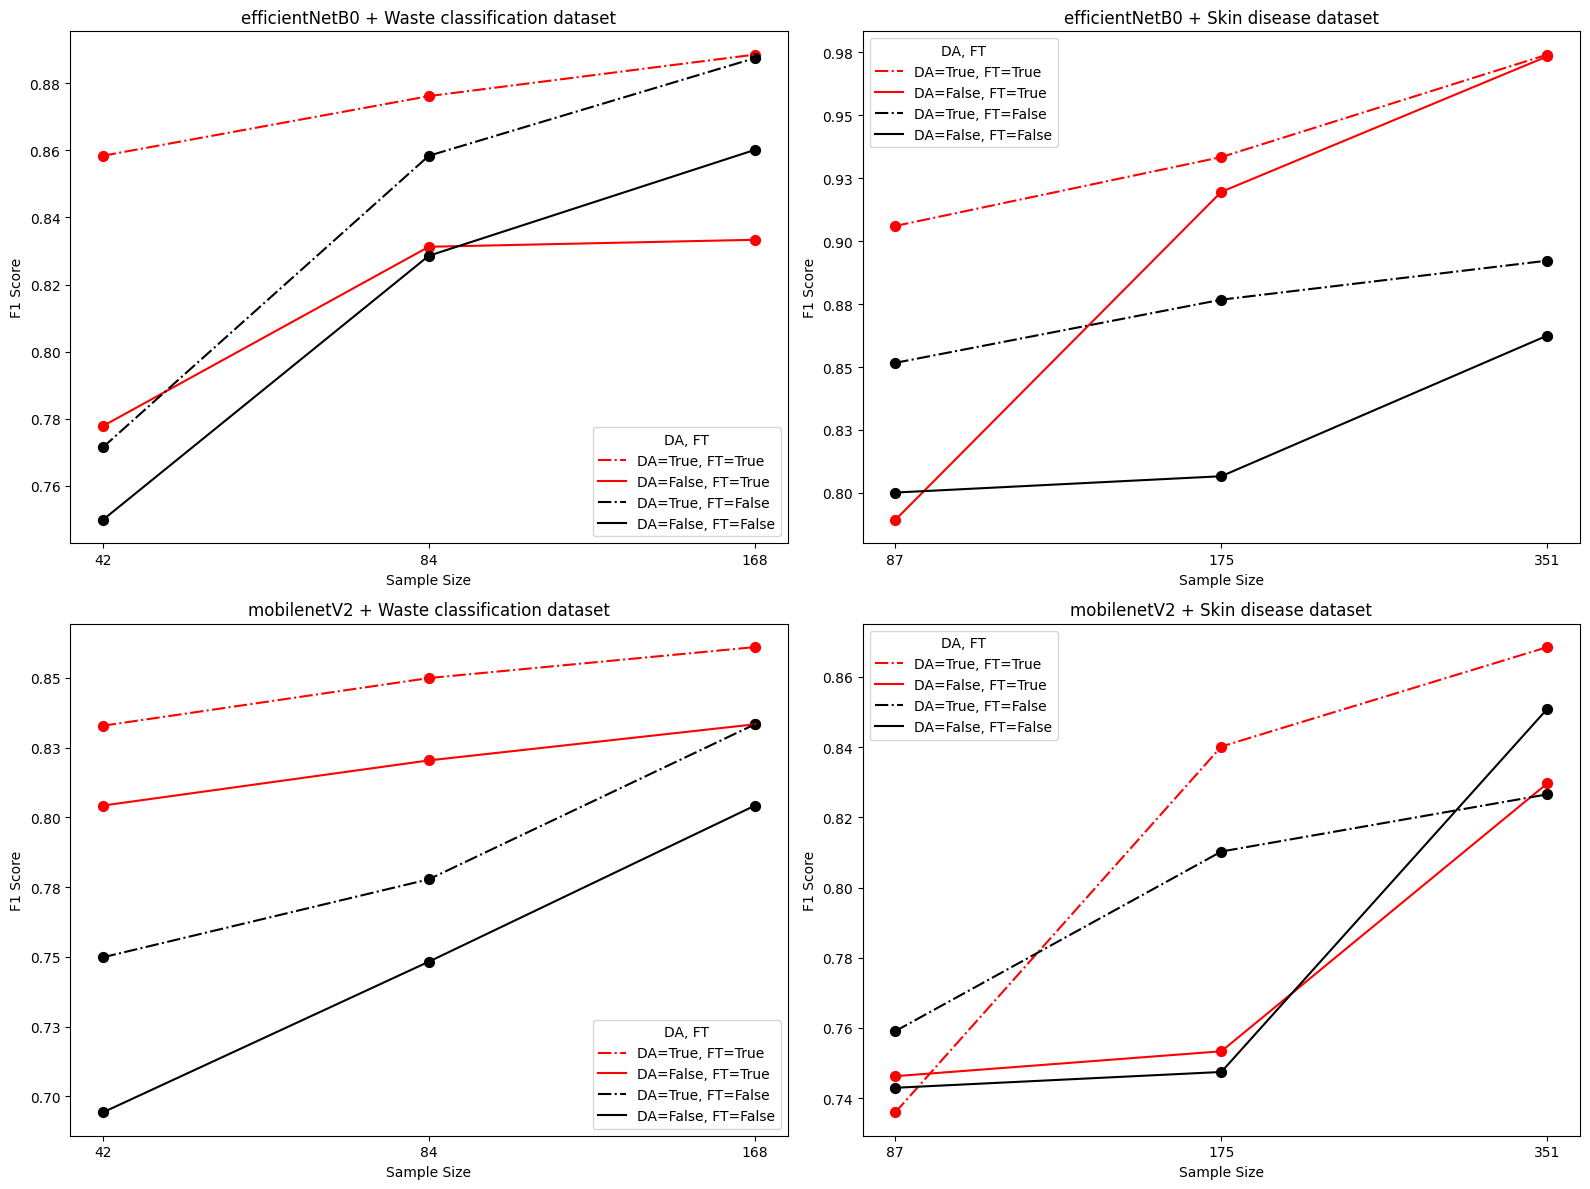

In [ ]:
# Define sample sizes, DA, and FT conditions
sample_sizes = {'S': {'W': 42, 'SD': 87}, 'M': {'W': 84, 'SD': 175}, 'L': {'W': 168, 'SD': 351}}
da_ft_conditions = [(True, True), (False, True), (True, False), (False, False)]
da_ft_labels = {(True, True): 'DA=True, FT=True', (False, True): 'DA=False, FT=True',
                (True, False): 'DA=True, FT=False', (False, False): 'DA=False, FT=False'}
da_ft_colors = {(True, True): 'red', (False, True): 'red', (True, False): 'black', (False, False): 'black'}
da_ft_linestyles = {(True, True): '-.', (False, True): '-', (True, False): '-.', (False, False): '-'}

# Set a larger overall figure size
plt.figure(figsize=(16, 12))

# Iterate over each (model, dataset) combination
for idx, (model, dataset) in enumerate([('efB0', 'W'), ('efB0', 'SD'), ('mobV2', 'W'), ('mobV2', 'SD')]):
    # Filter the data based on model and dataset
    filtered_data = df[(df['Model'] == model) & (df['Dataset'] == dataset)]

    # Create a new column 'DA_FT' combining 'DA' and 'FT'
    filtered_data['DA_FT'] = filtered_data.apply(lambda row: f"DA={row['DA']}, FT={row['FT']}", axis=1)

    # Create a subplot for each (model, dataset) combination
    plt.subplot(2, 2, idx + 1)
    for condition in da_ft_conditions:
        subset_data = filtered_data[filtered_data['DA_FT'] == da_ft_labels[condition]]
        sns.lineplot(x='Sample size', y='F1', data=subset_data, color=da_ft_colors[condition],
                     linestyle=da_ft_linestyles[condition], markers=True, label=da_ft_labels[condition], ci=None)

        # Put a point on each (x, y) position
        plt.scatter(subset_data['Sample size'], subset_data['F1'], color=da_ft_colors[condition], s=50)

    if model == 'efB0':
      model_name = 'efficientNetB0'

    if model == 'mobV2':
      model_name = 'mobilenetV2'

    if dataset == 'SD':
      dataset_name = 'Skin disease dataset'

    if dataset == 'W':
      dataset_name = 'Waste classification dataset'

    plt.title(f'{model_name} + {dataset_name}')
    plt.xlabel('Sample Size')
    plt.ylabel('F1 Score')

    # Convert dict_keys to a list for plt.xticks
    plt.xticks(list(sample_sizes.keys()), [sample_sizes[size][dataset] for size in sample_sizes.keys()])

    plt.legend(title='DA, FT')

    # Format y-axis to show 2 decimals
    plt.gca().yaxis.set_major_formatter('{:.2f}'.format)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


<ipython-input-6-70cba0ffd7fb>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DA_FT'] = filtered_data.apply(lambda row: f"DA={row['DA']}, FT={row['FT']}", axis=1)
<ipython-input-6-70cba0ffd7fb>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Time'] = filtered_data['Time'] / 3600
<ipython-input-6-70cba0ffd7fb>:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Sample size', y='Time', data=subset_data, color=da_

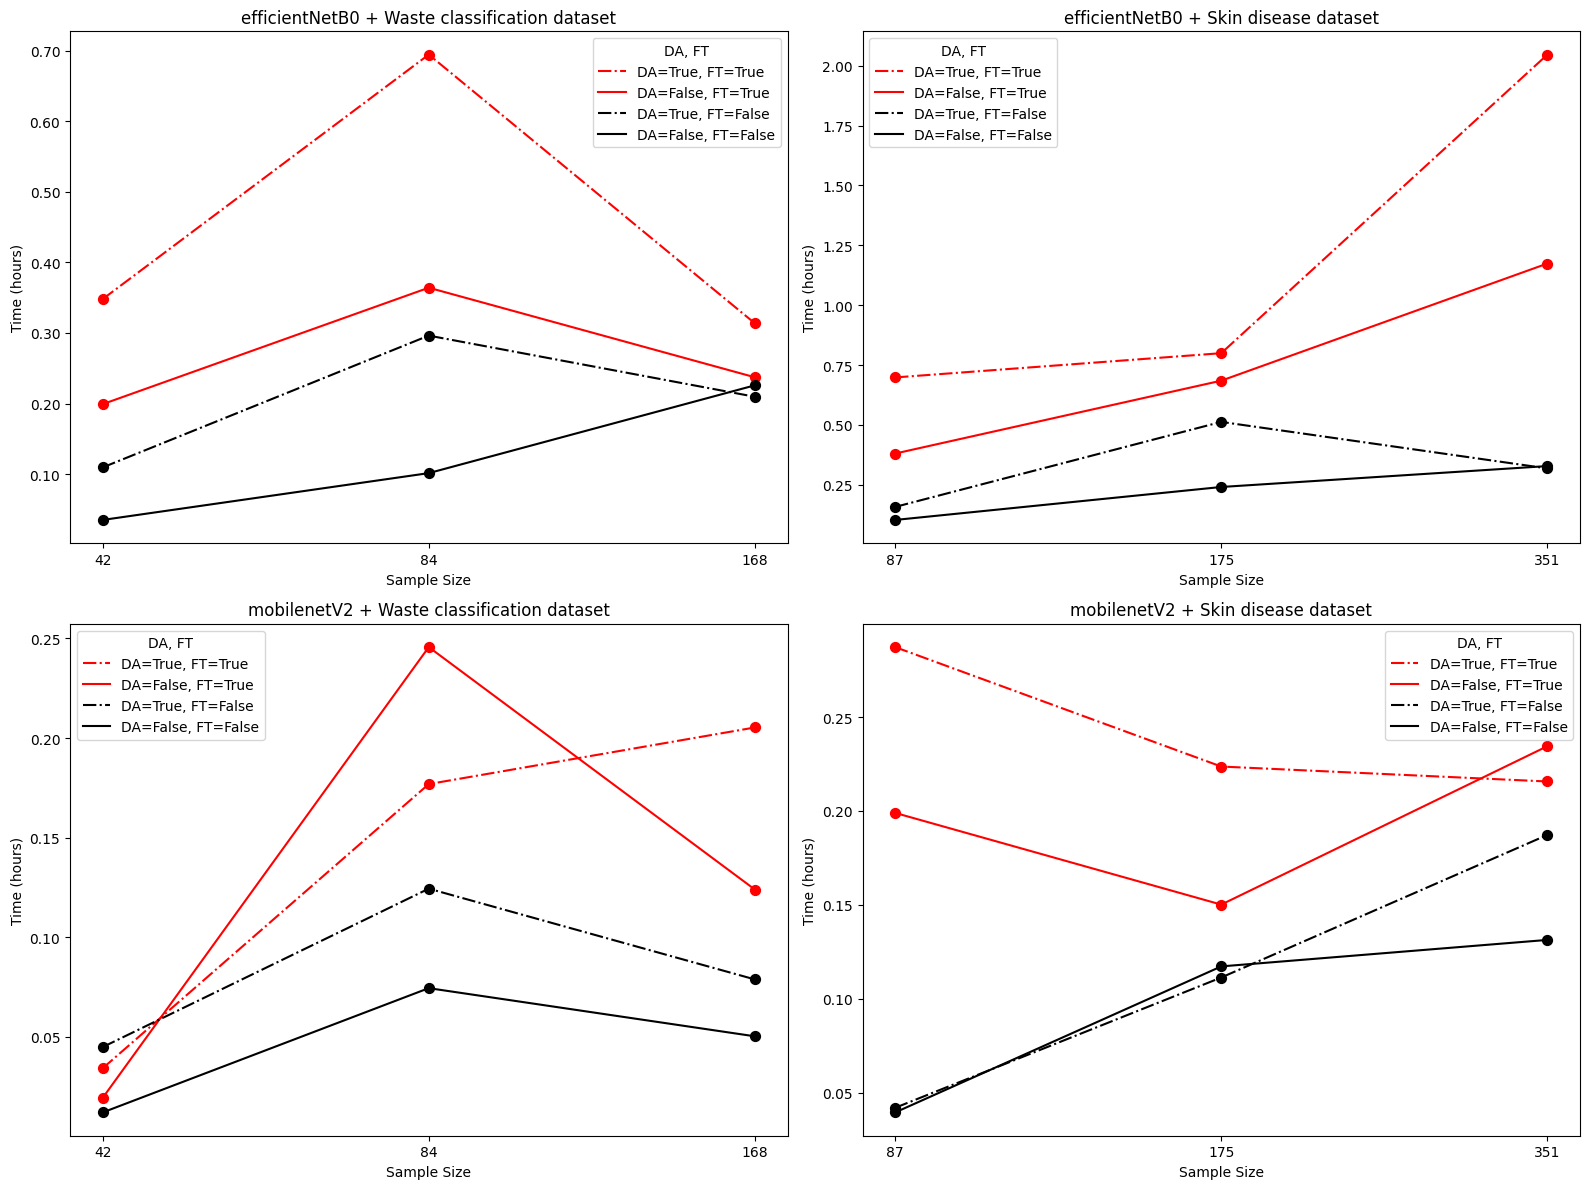

In [ ]:
# Define sample sizes, DA, and FT conditions
sample_sizes = {'S': {'W': 42, 'SD': 87}, 'M': {'W': 84, 'SD': 175}, 'L': {'W': 168, 'SD': 351}}
da_ft_conditions = [(True, True), (False, True), (True, False), (False, False)]
da_ft_labels = {(True, True): 'DA=True, FT=True', (False, True): 'DA=False, FT=True',
                (True, False): 'DA=True, FT=False', (False, False): 'DA=False, FT=False'}
da_ft_colors = {(True, True): 'red', (False, True): 'red', (True, False): 'black', (False, False): 'black'}
da_ft_linestyles = {(True, True): '-.', (False, True): '-', (True, False): '-.', (False, False): '-'}

# Set a larger overall figure size
plt.figure(figsize=(16, 12))

# Iterate over each (model, dataset) combination
for idx, (model, dataset) in enumerate([('efB0', 'W'), ('efB0', 'SD'), ('mobV2', 'W'), ('mobV2', 'SD')]):
    # Filter the data based on model and dataset
    filtered_data = df[(df['Model'] == model) & (df['Dataset'] == dataset)]

    # Create a new column 'DA_FT' combining 'DA' and 'FT'
    filtered_data['DA_FT'] = filtered_data.apply(lambda row: f"DA={row['DA']}, FT={row['FT']}", axis=1)

    # Convert 'Time' to hours
    filtered_data['Time'] = filtered_data['Time'] / 3600

    # Create a subplot for each (model, dataset) combination
    plt.subplot(2, 2, idx + 1)
    for condition in da_ft_conditions:
        subset_data = filtered_data[filtered_data['DA_FT'] == da_ft_labels[condition]]
        sns.lineplot(x='Sample size', y='Time', data=subset_data, color=da_ft_colors[condition],
                     linestyle=da_ft_linestyles[condition], markers=True, label=da_ft_labels[condition], ci=None)

        # Put a point on each (x, y) position
        plt.scatter(subset_data['Sample size'], subset_data['Time'], color=da_ft_colors[condition], s=50)

    if model == 'efB0':
      model_name = 'efficientNetB0'

    if model == 'mobV2':
      model_name = 'mobilenetV2'

    if dataset == 'SD':
      dataset_name = 'Skin disease dataset'

    if dataset == 'W':
      dataset_name = 'Waste classification dataset'

    plt.title(f'{model_name} + {dataset_name}')

    plt.xlabel('Sample Size')
    plt.ylabel('Time (hours)')

    # Convert dict_keys to a list for plt.xticks
    plt.xticks(list(sample_sizes.keys()), [sample_sizes[size][dataset] for size in sample_sizes.keys()])

    plt.legend(title='DA, FT')

    # Format y-axis to show 2 decimals
    plt.gca().yaxis.set_major_formatter('{:.2f}'.format)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


<ipython-input-10-22833d039e2e>:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Sample size', y='Test acc', data=filtered_data, color=da_ft_colors[(True, True)][model],
<ipython-input-10-22833d039e2e>:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Sample size', y='Test acc', data=filtered_data, color=da_ft_colors[(True, True)][model],
<ipython-input-10-22833d039e2e>:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Sample size', y='Test acc', data=filtered_data, color=da_ft_colors[(True, True)][model],
<ipython-input-10-22833d039e2e>:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Sample size', y='Test acc', data=filtered_data, color=da_ft_colors[(True, True)][model],


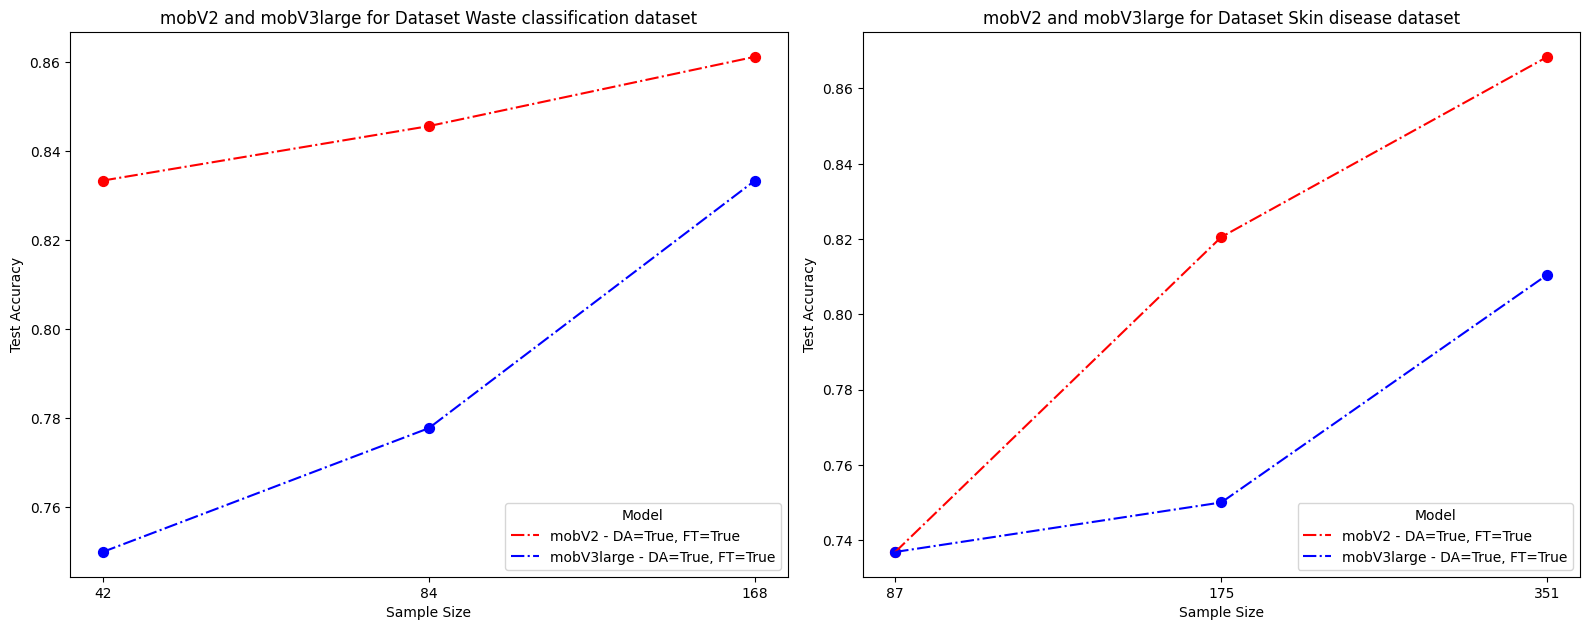

In [ ]:
# Load the data from the Excel file
excel_path = "/content/training_data.xlsx"
df = pd.read_excel(excel_path)

# Define sample sizes, DA, and FT conditions
sample_sizes = {'S': {'W': 42, 'SD': 87}, 'M': {'W': 84, 'SD': 175}, 'L': {'W': 168, 'SD': 351}}
da_ft_conditions = [(True, True)]
da_ft_labels = {(True, True): 'DA=True, FT=True'}
da_ft_colors = {(True, True): {'mobV2': 'red', 'mobV3large': 'blue'}}
da_ft_linestyles = {(True, True): '-.'}

# Set a larger overall figure size
plt.figure(figsize=(16, 12))

# Iterate over each dataset
for idx, dataset in enumerate(['W', 'SD']):
    # Create a subplot for each dataset
    plt.subplot(2, 2, idx + 1)

    # Plot the data for mobV2 and mobV3large
    for model in ['mobV2', 'mobV3large']:
        filtered_data = df[(df['Model'] == model) & (df['Dataset'] == dataset) & (df['DA'] == True) & (df['FT'] == True)]
        sns.lineplot(x='Sample size', y='Test acc', data=filtered_data, color=da_ft_colors[(True, True)][model],
                     linestyle=da_ft_linestyles[(True, True)], markers=True, label=f'{model} - {da_ft_labels[(True, True)]}', ci=None)

        # Put a point on each (x, y) position
        plt.scatter(filtered_data['Sample size'], filtered_data['Test acc'], color=da_ft_colors[(True, True)][model], s=50)

    # Set plot title and labels for mobV2 and mobV3large
    if model == 'efB0':
      model_name_1 = 'efficientNetB0'

    if model == 'mobV2':
      model_name_1 = 'mobilenetV2'

    if model == 'efB5':
      model_name_2 = 'efficientNetB5'

    if model == 'mobV3large':
      model_name_2 = 'mobilenetV3large'

    if dataset == 'SD':
      dataset_name = 'Skin disease dataset'

    if dataset == 'W':
      dataset_name = 'Waste classification dataset'

    plt.title(f'{" and ".join(["mobV2", "mobV3large"])} for Dataset {dataset_name}')
    plt.xlabel('Sample Size')
    plt.ylabel('Test Accuracy')

    # Convert dict_keys to a list for plt.xticks
    plt.xticks(list(sample_sizes.keys()), [sample_sizes[size][dataset] for size in sample_sizes.keys()])

    plt.legend(title='Model', loc='lower right')

    # Format y-axis to show 6 decimals
    plt.gca().yaxis.set_major_formatter('{:.2f}'.format)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

<ipython-input-11-4916af327bdc>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Sample size', y='Test acc', data=filtered_data, color=da_ft_colors[(True, True)][model],
<ipython-input-11-4916af327bdc>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Sample size', y='Test acc', data=filtered_data, color=da_ft_colors[(True, True)][model],
<ipython-input-11-4916af327bdc>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Sample size', y='Test acc', data=filtered_data, color=da_ft_colors[(True, True)][model],
<ipython-input-11-4916af327bdc>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Sample size', y='Test acc', data=filtered_data, color=da_ft_colors[(True, True)][model],


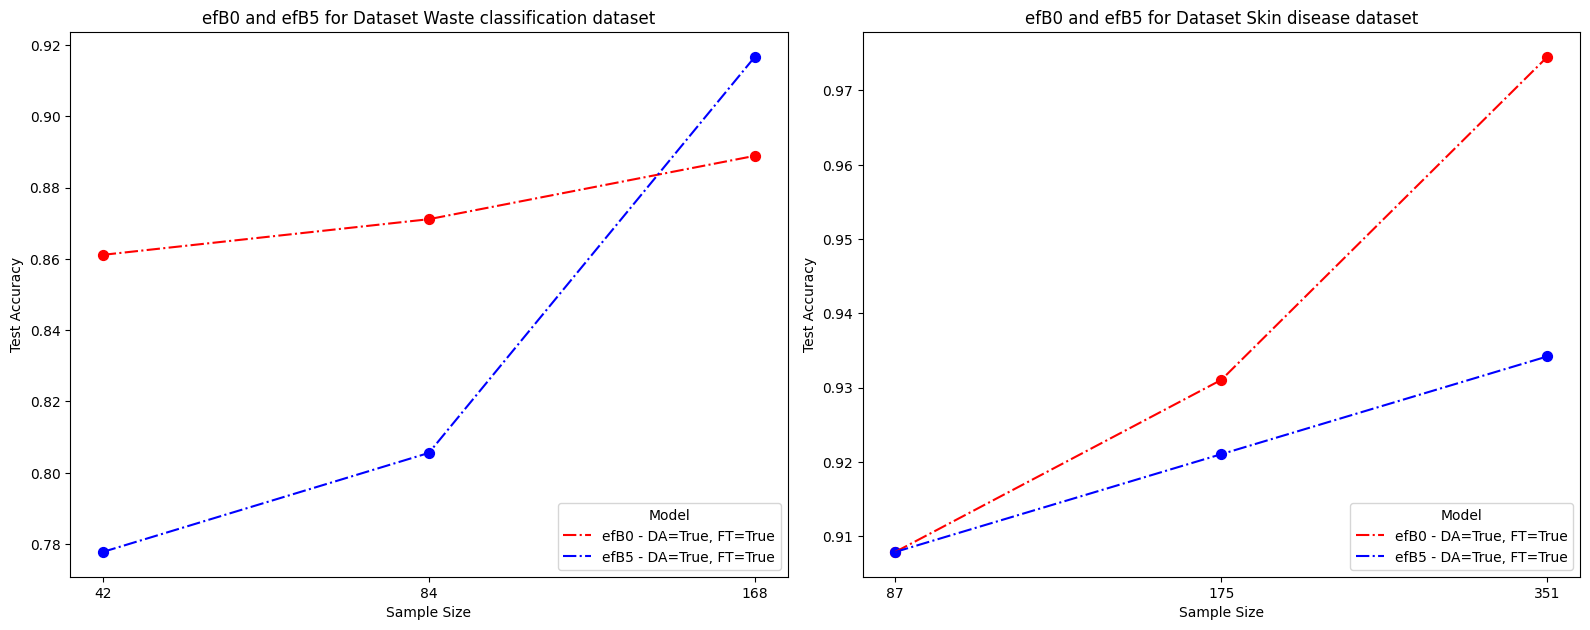

In [ ]:
# Load the data from the Excel file
excel_path = "/content/training_data.xlsx"
df = pd.read_excel(excel_path)

# Define sample sizes, DA, and FT conditions
sample_sizes = {'S': {'W': 42, 'SD': 87}, 'M': {'W': 84, 'SD': 175}, 'L': {'W': 168, 'SD': 351}}
da_ft_conditions = [(True, True)]
da_ft_labels = {(True, True): 'DA=True, FT=True'}
da_ft_colors = {(True, True): {'efB0': 'red', 'efB5': 'blue'}}
da_ft_linestyles = {(True, True): '-.'}

# Set a larger overall figure size
plt.figure(figsize=(16, 12))

# Iterate over each dataset
for idx, dataset in enumerate(['W', 'SD']):
    # Create a subplot for each dataset
    plt.subplot(2, 2, idx + 1)

    for model in ['efB0', 'efB5']:
        filtered_data = df[(df['Model'] == model) & (df['Dataset'] == dataset) & (df['DA'] == True) & (df['FT'] == True)]
        sns.lineplot(x='Sample size', y='Test acc', data=filtered_data, color=da_ft_colors[(True, True)][model],
                     linestyle=da_ft_linestyles[(True, True)], markers=True, label=f'{model} - {da_ft_labels[(True, True)]}', ci=None)

        # Put a point on each (x, y) position
        plt.scatter(filtered_data['Sample size'], filtered_data['Test acc'], color=da_ft_colors[(True, True)][model], s=50)

    if model == 'efB0':
      model_name_1 = 'efficientNetB0'

    if model == 'mobV2':
      model_name_1 = 'mobilenetV2'

    if model == 'efB5':
      model_name_2 = 'efficientNetB5'

    if model == 'mobV3large':
      model_name_2 = 'mobilenetV3large'

    if dataset == 'SD':
      dataset_name = 'Skin disease dataset'

    if dataset == 'W':
      dataset_name = 'Waste classification dataset'

    plt.title(f'{" and ".join(["efB0", "efB5"])} for Dataset {dataset_name}')

    plt.xlabel('Sample Size')
    plt.ylabel('Test Accuracy')

    # Convert dict_keys to a list for plt.xticks
    plt.xticks(list(sample_sizes.keys()), [sample_sizes[size][dataset] for size in sample_sizes.keys()])

    plt.legend(title='Model', loc='lower right')

    # Format y-axis to show 6 decimals
    plt.gca().yaxis.set_major_formatter('{:.2f}'.format)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
